# Earthquake Impact Visualization
## 地震の発生とその影響を感じる可視化

USGSのライブ地震データを使って、世界で発生している地震を地図上にプロットし、震度（マグニチュード）による違いや、発生頻度の変化を視覚的に示す。


Matplotlib is building the font cache; this may take a moment.


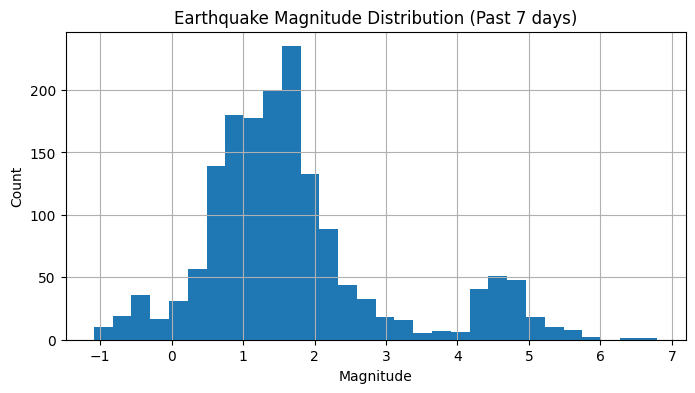

In [12]:
import pandas as pd
import requests
import folium
from datetime import datetime

# USGS地震データ（過去7日分）
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_week.csv"
df = pd.read_csv(url)

df.head()

# 地図の中心を太平洋付近に設定
m = folium.Map(location=[0, 160], zoom_start=2)

# マグニチュードに応じてマーカーの大きさ・色を変化
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=row["mag"] * 2,
        color="red" if row["mag"] >= 5 else "orange",
        fill=True,
        fill_opacity=0.6,
        popup=f"M{row['mag']} - {row['place']}"
    ).add_to(m)

m.save("earthquake_map.html")
m

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df["mag"].hist(bins=30)
plt.title("Earthquake Magnitude Distribution (Past 7 days)")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()



USGSの地震データを使い、過去1週間の地震発生を地図上で可視化した。マグニチュードが大きいほど円を大きく赤く表示することで、地震の規模と地域の分布が一目で分かるようにした。また、発生数のヒストグラムから、比較的小規模（M3〜4）の地震が多数を占めることが確認できた。地震が日常的に世界各地で発生している現実を、視覚的に実感できる分析となった。
